# Les librairie utilisé

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


## importation de la base de donnée

In [81]:
DataFrame = pd.read_csv("Data_Arbre.csv")
print(DataFrame.head())

   longitude   latitude              clc_quartier             clc_secteur  \
0   3.293264  49.840500  Quartier du Centre-Ville             Quai Gayant   
1   3.273380  49.861409    Quartier du Vermandois              Stade Cepy   
2   3.289068  49.844513  Quartier du Centre-Ville   Rue Villebois Mareuil   
3   3.302387  49.861778      Quartier de l'Europe  Square des Marronniers   
4   3.304047  49.858446      Quartier de l'Europe           Avenue Buffon   

   haut_tot  haut_tronc  tronc_diam fk_arb_etat fk_stadedev     fk_port  \
0       6.0         2.0        37.0    EN PLACE       Jeune  semi libre   
1      13.0         1.0       160.0    EN PLACE      Adulte  semi libre   
2      12.0         3.0       116.0    REMPLACÉ      Adulte  semi libre   
3      16.0         3.0       150.0    EN PLACE      Adulte  semi libre   
4       5.0         2.0       170.0    Essouché      Adulte      réduit   

  fk_pied fk_situation fk_revetement  age_estim  fk_prec_estim  clc_nbr_diag  \
0   ga

## Observation de notre matrice de correlation

Les dix premières instances du DataFrame après transformation des colonnes qualitatives en valeurs numériques : 

   longitude   latitude  clc_quartier  clc_secteur  haut_tot  haut_tronc  \
0   3.293264  49.840500           7.0        112.0       6.0         2.0   
1   3.273380  49.861409           8.0        228.0      13.0         1.0   
2   3.289068  49.844513           7.0        166.0      12.0         3.0   
3   3.302387  49.861778           6.0        225.0      16.0         3.0   
4   3.304047  49.858446           6.0          4.0       5.0         2.0   
5   3.305537  49.860928           6.0        156.0       8.0         3.0   
6   3.271264  49.837897           4.0        176.0       6.0         3.0   
7   3.270542  49.837590           4.0        176.0       9.0         4.0   
8   3.270364  49.837514           4.0        176.0       9.0         4.0   
9   3.269999  49.837363           4.0        176.0       9.0         2.0   

   tronc_diam  fk_arb_etat  fk_stadedev  fk_port 

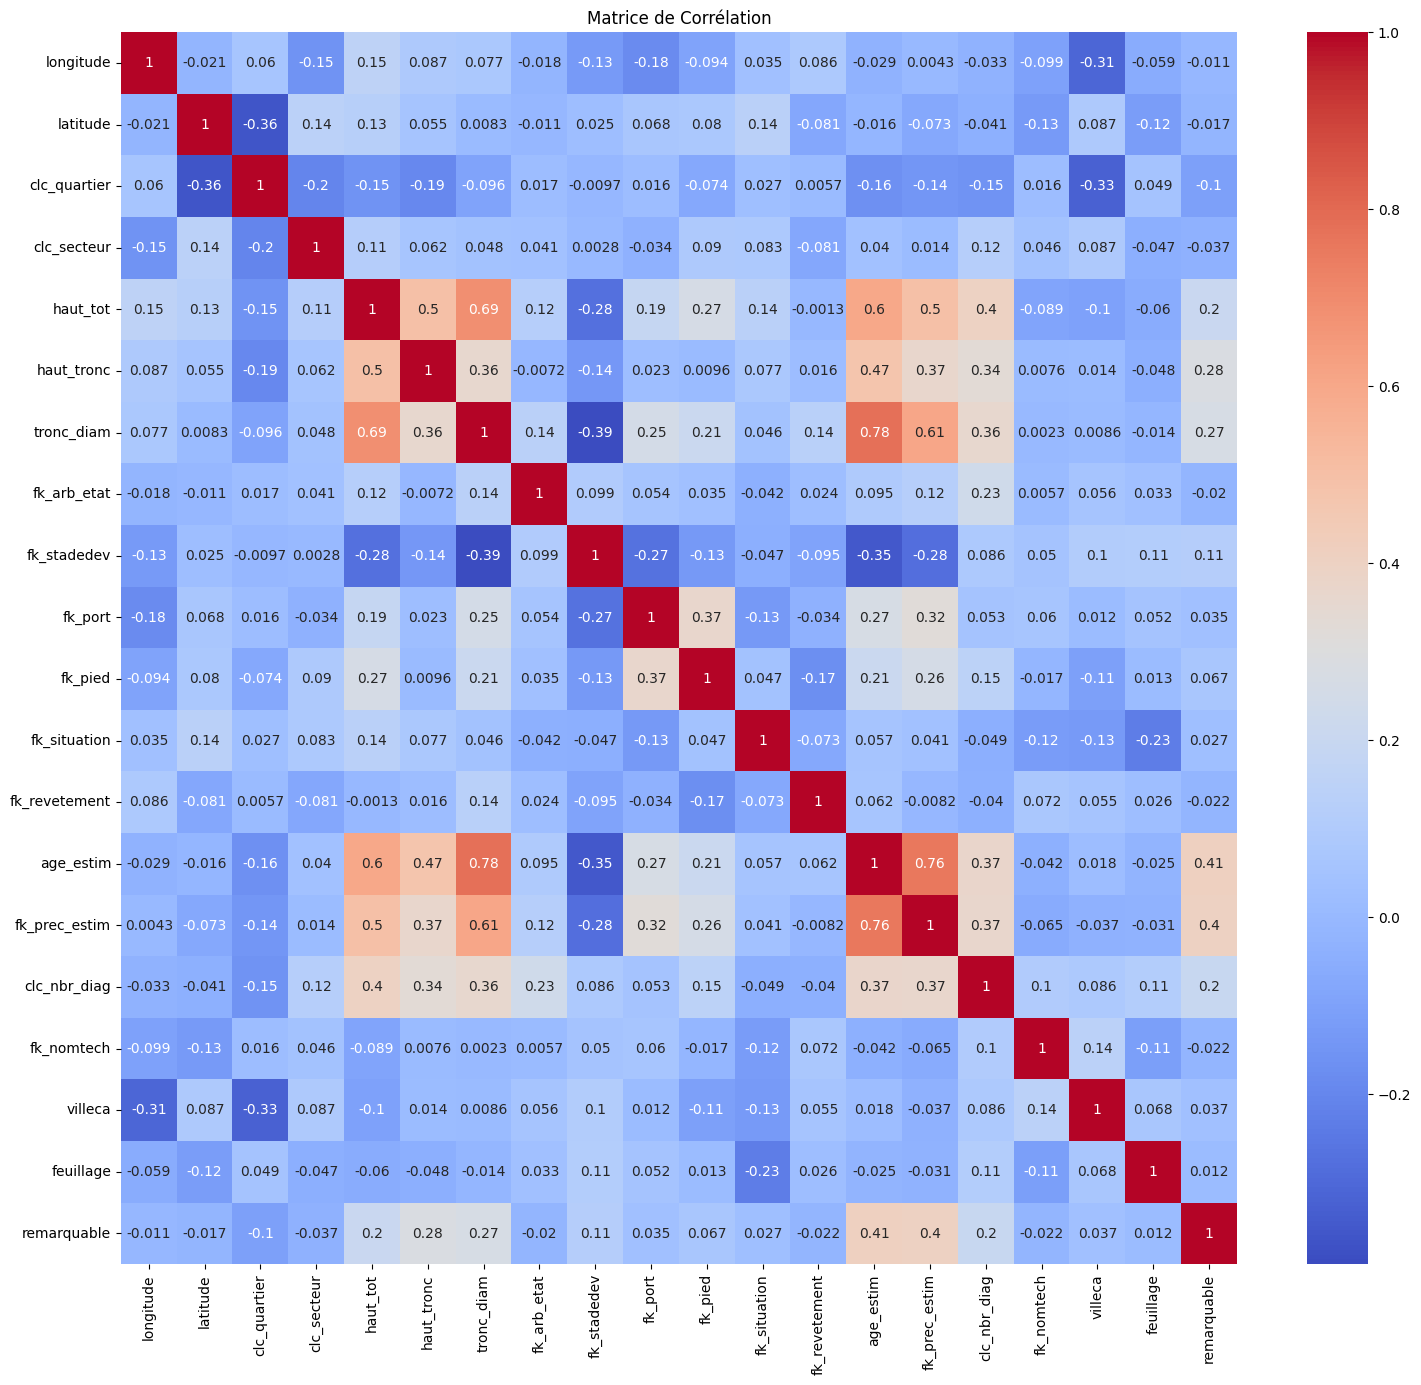

In [83]:
#l'encodage de nos données a déjà été effectué dans le fichier "Data_Arbre.csv".
#comment choisir les colonnes pertinentes pour la prédiction de la position des arbres susceptibles d'être déracinés en cas de tempête ?
#1 . Identifier les colonnes pertinentes via une matrice de corrélation des valeurs numériques
#https://www.delftstack.com/fr/howto/python-pandas/pandas-correlation-matrix/


# Sélectionner les colonnes qualitatives
# On décide de retirer les colonnes clc_secteur, clc_quartier et fk_nomtech et car elles ne sont pas pertinentes pour la prédiction de la position des arbres susceptibles d'être déracinés en cas de tempête
qualitative_columns = ['fk_arb_etat', 'fk_stadedev', 'fk_port', 'fk_pied', 'fk_situation', 'fk_revetement', 'villeca', 'feuillage', 'remarquable', 'clc_secteur', 'clc_quartier', 'fk_nomtech']

# Transformer les colonnes qualitatives en valeurs numériques comme vu en tp1
#Normalisation des données
#on aurait aussi pu utiliser la fonction standardScaler de sklearn
encoder = OrdinalEncoder()
DataFrame[qualitative_columns] = encoder.fit_transform(DataFrame[qualitative_columns])

# Afficher les dix premières instances pour vérifier le résultat
print("Les dix premières instances du DataFrame après transformation des colonnes qualitatives en valeurs numériques : \n")
print(DataFrame.head(10))

# Calcul de la matrice de corrélation
correlation_matrix = DataFrame.corr()

# Afficher la matrice de corrélation
print("\n\nMatrice de corrélation : \n")
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()



## Conclusion de notre matrice de corrélation

In [73]:
# Notre cible est la colonne 'fk_arb_etat'
# En nous aidant de la matrice de corrélation des valeurs numériques, nous pouvons identifier les colonnes les plus corrélées avec la colonne 'fk_arb_etat'
# Les colonnes les plus corrélées avec la colonne 'fk_arb_etat' sont les colonnes 'fk_stadedev', haut_tot, tronc_diam, fk_prec_estim, clc_nbr_diag, age_estim
print("\n\nLes colonnes les plus corrélées avec la colonne 'fk_arb_etat' sont les colonnes 'fk_stadedev', haut_tot, tronc_diam, fk_prec_estim, clc_nbr_diag, age_estim")
#essayer de rajouter fk_port car peut être utile et potentiellement retirer fk_prec_estim et clc_nbr_diag car fk_prec_estim n'est que la prcision de l'estimation de l'arbre et clc_nbr_diag est le nombre de diagnostiques de l'arbre
print("\nOn peut maintenant sélectionner les colonnes pertinentes de la base de données afin de prédire la position des arbres susceptibles d'être déracinés en cas de tempête.")







Les colonnes les plus corrélées avec la colonne 'fk_arb_etat' sont les colonnes 'fk_stadedev', haut_tot, tronc_diam, fk_prec_estim, clc_nbr_diag, age_estim

On peut maintenant sélectionner les colonnes pertinentes de la base de données afin de prédire la position des arbres susceptibles d'être déracinés en cas de tempête.


##Apprentissage Supervisé pour la classification

In [77]:
#On va retrouver plusieurs modèles d'apprentissage supervisé pour prédire la position des arbres susceptibles d'être déracinés en cas de tempête
#https://scikit-learn.org/stable/supervised_learning.html#
#Commençons avec le modèle d'apprentissage supervisé de random forest car c'est celui que l'on a le plus vu en cours
#https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

# Séparer les données en ensembles d'entraînement et de test
#les différentes valeurs de la colonne 'fk_arb_etat' sont 'EN PLACE' 'REMPLACÉ' 'Essouché' 'Non essouché' 'SUPPRIMÉ' 'ABBATU'
#elles ont été encodées en valeurs numériques de 0 à 5 donc 'Essouché' est la valeur 2
# le but est de prédire la position des arbres susceptibles d'être déracinés en cas de tempête 'Essouché'

X = DataFrame.drop(columns=['fk_arb_etat'])
#DataFrame['fk_arb_etat'] = DataFrame['fk_arb_etat'].apply(lambda x: 1 if x == 2.0 else 0)
y = DataFrame['fk_arb_etat']

print(DataFrame['fk_arb_etat'])
count = y.value_counts()
print(count)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7404    0.0
7405    0.0
7406    0.0
7407    0.0
7408    0.0
Name: fk_arb_etat, Length: 7409, dtype: float64
fk_arb_etat
0.0    7409
Name: count, dtype: int64


In [57]:
#Division de la base de données en données d'apprentissage et données de test (80% pour l'apprentissage et 20% pour le test), la répartition est aléatoire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions des données d'apprentissage :", X_train.shape, y_train.shape)
print("Dimensions des données de test :", X_test.shape, y_test.shape)



Dimensions des données d'apprentissage : (5927, 19) (5927,)
Dimensions des données de test : (1482, 19) (1482,)


In [51]:
# Initialiser le classificateur
clf = RandomForestClassifier(n_estimators=100)

# Calculer le temps d'exécution nécessaire pour l'apprentissage
start = time.time()
clf.fit(X_train, y_train)
end = time.time()

execution_time = end - start

# Afficher le temps d'exécution formaté avec 2 chiffres après la virgule
print("Temps d'exécution pour l'apprentissage : {:.2f} secondes".format(execution_time))

# Obtenir les prédictions croisées
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)

# Évaluer les prédictions croisées sur l'ensemble d'entraînement
print("Évaluation sur les prédictions croisées de l'ensemble d'entraînement :")
print(classification_report(y_train, y_train_pred))

# Évaluer le modèle sur l'ensemble de test
y_test_pred = clf.predict(X_test)

# Calculer le taux de classification
accuracy = accuracy_score(y_test, y_test_pred)
print("Taux de classification sur l'ensemble de test : {:.2f}%".format(accuracy * 100))

Temps d'exécution pour l'apprentissage : 0.09 secondes
Évaluation sur les prédictions croisées de l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927

    accuracy                           1.00      5927
   macro avg       1.00      1.00      1.00      5927
weighted avg       1.00      1.00      1.00      5927

Taux de classification sur l'ensemble de test : 100.00%


In [ ]:
#utilisation de cross_val_predict pour obtenir les prédictions de chaque élément de la base de données
